In [2]:
import tensorflow as tf
import numpy as np



In [3]:
#Declaramos los eventos en arreglos de 7 numeros, que seran nuestros datos de entrada y salida.
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
#cada modelo tiene al menos una capa de entrada y una capa de salida y cada neurona tiene un peso y tiene un sesgo 
#en keras podemos ahorrarnos un paso y especificar solo la capa de salida
#las capas densas son las capas que tienen conexion desde cada neuorna hacia todas las neouronas de la siguiente capa
#units cantidad de neuronas // input_shape nos autoregistra la capa de entrada con 1 neurona
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#usamos el tipo de modelo secuencial
modelo = tf.keras.Sequential([capa])

In [5]:
# compilamos el modelo / prepara el modelo para ser entrenado
# propiedades optimizador amdam /como ajustar los pesos de manera eficiente (tasa de aprendizaje = que tanto ajustar los pesos y sesgos)
# funion de perdida / una poca cantidad de errores grandes es peor que una gran catidad de errores pequeños 
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
#funcion fit para entrenar, le damos los datos de entrada y resultados a esperar
#epoch cuantas vueltas quiero que lo intente ( en este caso una vuelta significaria revisar los 7 datos una sola vez)
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


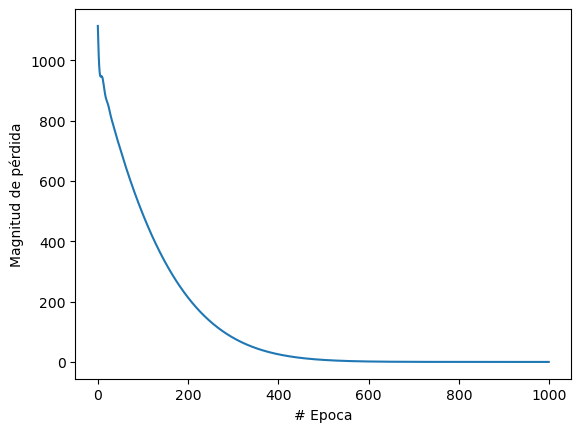

In [7]:
import matplotlib.pyplot as plt
#Resultado de la funcion de perdida, nos dice que tan mal estan los resultado de la red en cada vuelta que dio
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
# conforme fue haciendo mas vueltas, los errores fueron disminuyendo
# quizas con 500 600 vueltas ya sera sufiente, ya despues no mejora mucho

In [10]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 104ms/step
El resultado es [[211.7441]] fahrenheit!


In [11]:
print("Variables internas del modelo")
print(capa.get_weights())
#el peso lo asigno en 1.70 y el sesgoen 31.93

Variables internas del modelo
[array([[1.7981313]], dtype=float32), array([31.930954], dtype=float32)]


Resolvemos el mismo problema agregando mas capas y neuronas aplicando el mismo proceso

In [12]:
#agregamos 2 capas intermedias con 3 neuronas cada una
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [13]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error' 
)

In [15]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


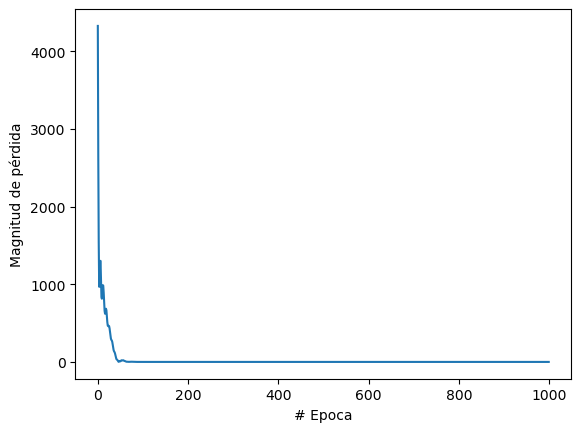

In [16]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
#el aprendizaje fue mucho más rápido, ya desde la epoca 50 o 60 ya no aprendio nada mas
#en este escenario una red más compleja nos da resultados mas rápido

In [17]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 109ms/step
El resultado es [[211.74744]] fahrenheit!


In [18]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.40335104,  1.0233282 , -0.05234905]], dtype=float32), array([0.25037876, 4.4866815 , 3.4015028 ], dtype=float32)]
[array([[-0.08187785,  0.23791845, -0.4676982 ],
       [-0.9804476 , -1.2781304 , -0.33012536],
       [ 0.078123  , -0.25589603, -1.2210662 ]], dtype=float32), array([-2.823417 , -4.5337253, -4.318361 ], dtype=float32)]
[array([[-0.46342564],
       [-0.8773407 ],
       [-1.4830083 ]], dtype=float32), array([4.064923], dtype=float32)]


conclusión

Logramos obtener una red que, sin que le dijéramos la fórmula, pudo llegar a un resultado que es prácticamente exacto.
Cabe aclarar que en este escenario especifico, ya que se trata de una función lineal (y=mx + b=). En un problema más complejo no podríamos resolver con una red tan simple.

Además, podemos observar que al agregar más capas y neuronas, el aprendizaje fue mucho más rápido por lo que concluimos que en este caso particular, una red más compleja nos da resultados "más rápidos".




